In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import os
import random
from pprint import pprint
import scipy.stats as sts

In [2]:
file_path = os.path.join("..", "Resources", "analysis_crime.csv")
crimeDF = pd.read_csv(file_path)
print(f"Data Shape: {crimeDF.shape}")
crimeDF.head()

Data Shape: (70, 9)


,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]"
0,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218
1,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739
2,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448
3,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427
4,La Porte,2012,35054.0,61.0,604.0,665.0,189.707309,17.401723,172.305586


In [3]:
file_path = os.path.join("..", "Resources", "cities_housing_new.csv")
housingDF = pd.read_csv(file_path)
print(f"Data Shape: {housingDF.shape}")
housingDF.head()

Data Shape: (1040, 24)


,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,-27.9%,88,9.0,10.0,$220K,-0.7%,-5.0%,183,27.1%,-9.0%
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2.0,17.0,$185K,7.5%,9.4%,154,13.2%,13.2%
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,19.3%,77,15.0,42.0,$139K,-6.1%,-9.8%,130,-11.0%,62.5%
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,21.8%,61,-9.0,56.0,$84K,23.0%,222.4%,43,-27.1%,34.4%
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,-15.0%,69,12.0,5.0,$120K,0.2%,9.0%,110,-22.0%,20.9%


In [4]:
# clean up the data for the housingDF to match Crime Data

housingDF['Region'] = housingDF['Region'].replace(", TX","", regex=True)
housingDF['Month of Period End'] = housingDF['Month of Period End'].str[-4:]
housingDF["Median Sale Price"] = housingDF["Median Sale Price"].str.lower().replace('k','',regex=True)
housingDF["Median Sale Price"] = housingDF["Median Sale Price"].str.replace('$','',regex=True)
housingDF["Median Sale Price"] = housingDF["Median Sale Price"].astype(float)
housingDF["Median Sale Price"] = housingDF["Median Sale Price"]  * 1000.0

housingDF
 

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,Sugar Land,2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,-27.9%,88,9.0,10.0,220000.0,-0.7%,-5.0%,183,27.1%,-9.0%
1,Missouri City,2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2.0,17.0,185000.0,7.5%,9.4%,154,13.2%,13.2%
2,Galveston,2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,19.3%,77,15.0,42.0,139000.0,-6.1%,-9.8%,130,-11.0%,62.5%
3,Texas City,2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,21.8%,61,-9.0,56.0,84000.0,23.0%,222.4%,43,-27.1%,34.4%
4,Baytown,2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,-15.0%,69,12.0,5.0,120000.0,0.2%,9.0%,110,-22.0%,20.9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,League City,2018,All Residential,Place/City,False,TX,0.986064,1.1%,0.2%,171,...,-13.0%,31,-28.0,-6.0,275000.0,3.1%,7.8%,206,30.4%,-10.4%
1036,Pasadena,2018,All Residential,Place/City,False,TX,0.968382,-0.1%,-0.2%,61,...,42.3%,19,1.0,-13.0,174000.0,12.7%,2.4%,85,-14.1%,11.8%
1037,Galveston,2019,All Residential,Place/City,False,TX,0.958958,-0.9%,-0.1%,142,...,2.1%,44,-24.0,3.0,250000.0,-7.4%,4.4%,201,-12.6%,-2.4%
1038,Missouri City,2020,All Residential,Place/City,False,TX,0.973769,0.5%,0.7%,139,...,-9.9%,67,12.0,-5.0,250000.0,6.7%,8.5%,224,43.6%,36.6%


In [7]:
# group by Region and Month of Period End
houseGroup = housingDF.groupby(['Region', 'Month of Period End'])

# add columns to the crimeDF to have new values
crimeDF["Median Sale Price"] = ''
crimeDF["DOM"] =  ''
crimeDF['Homes Sold'] =''
 
# iterate through the group, and retrieve the rows in the crimeDF and update the values
for index, group in houseGroup: 
    
    for i, row in crimeDF.iterrows() :   # check to replace with get function - NB pending
        
        if (row['City'] == index[0]) & (row['Year'] == int(index[1])):
            # update the column values
            crimeDF.at[i,'Median Sale Price'] = group['Median Sale Price'].mean()
            crimeDF.at[i,"DOM"] = group['Median Dom'].mean()
            crimeDF.at[i,"Homes Sold"] = group['Homes Sold'].sum()



file_path = os.path.join("..", "Resources", "Redfin_CrimeMergeDataset.csv")
crimeDF.to_csv(file_path, index = False)
crimeDF

,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]",Median Sale Price,DOM,Homes Sold
0,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218,116000,75.5,885
1,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739,184917,80.5833,770
2,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448,152083,84.3333,854
3,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427,150917,56.25,26981
4,La Porte,2012,35054.0,61.0,604.0,665.0,189.707309,17.401723,172.305586,103417,67.6667,356
...,...,...,...,...,...,...,...,...,...,...,...,...
65,League City,2018,105351.0,97.0,1718.0,1815.0,172.281231,9.207316,163.073915,266083,31.5,2041
66,Missouri City,2018,75863.0,149.0,969.0,1118.0,147.370919,19.640668,127.730251,247917,44.8333,1654
67,Pasadena,2018,154000.0,711.0,3773.0,4484.0,291.168831,46.168831,245.000000,166417,17.0833,976
68,Sugar Land,2018,89790.0,71.0,1289.0,1360.0,151.464528,7.907339,143.557189,313583,52.5,2055


The correlation coefficient (r) is -0.5


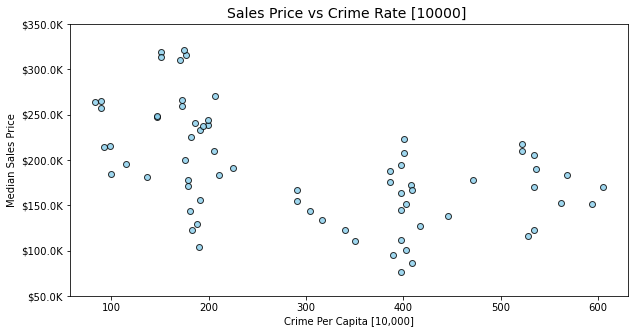

In [18]:
x_values = crimeDF['Total Crime Per Capita [10,000]']
y_values = crimeDF['Median Sale Price']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, alpha=0.8, color ='skyblue', marker="o", edgecolor="black")

# Add labels
plt.xlabel('Crime Per Capita [10,000]')
plt.ylabel('Median Sales Price')

# add tick labels

locs, labels = plt.yticks() 

yLabels =('$' + str(float(x/1000.0)) + 'K' for x in locs)
plt.yticks(locs,yLabels )
 
#add title
plt.title("Sales Price vs Crime Rate [10000] ", fontsize=14)

# get correlation coefficient
correlation = sts.pearsonr(crimeDF['Total Crime Per Capita [10,000]'], crimeDF['Median Sale Price'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Crime Vs Sales Price [10000].png")
plt.savefig(output_path)


The correlation coefficient (r) is 0.33


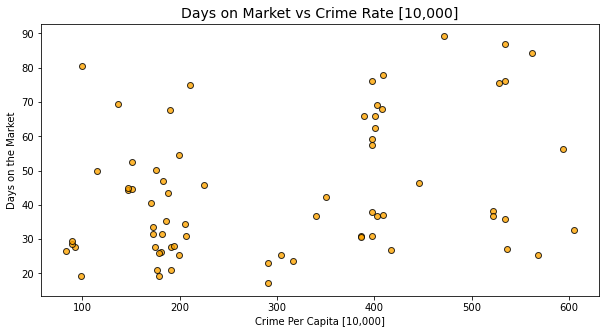

In [20]:
#scatter plot mapping crime with DOM 

x_values = crimeDF['Total Crime Per Capita [10,000]']
y_values = crimeDF['DOM']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, alpha=0.8, color ='orange', marker="o", edgecolor="black")

# Add labels
plt.xlabel('Crime Per Capita [10,000]')
plt.ylabel('Days on the Market')

#add title
plt.title("Days on Market vs Crime Rate [10,000]", fontsize=14)
 
# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Crime Vs Days on Market.png")
plt.savefig(output_path)

# get correlation coefficient
correlation = sts.pearsonr(crimeDF['Total Crime Per Capita [10,000]'], crimeDF['DOM'])
print(f"The correlation coefficient (r) is {round(correlation[0],2)}")


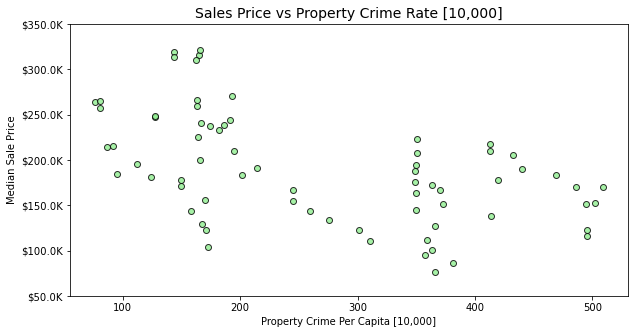

In [9]:
#scatter plot mapping violent crime with Price 

x_values = crimeDF['Property Crime Per Capita [10,000]']
y_values = crimeDF['Median Sale Price']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, alpha=0.8, color ='lightgreen', marker="o", edgecolor="black")

# Add labels
plt.xlabel('Property Crime Per Capita [10,000]')
plt.ylabel('Median Sale Price')

#add title
plt.title("Sales Price vs Property Crime Rate [10,000]", fontsize=14)

# add tick labels
locs, labels = plt.yticks() 
yLabels =('$' + str(float(x/1000.0)) + 'K' for x in locs)
plt.yticks(locs,yLabels )

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Property Crime Vs Sales Price.png")
plt.savefig(output_path)

 

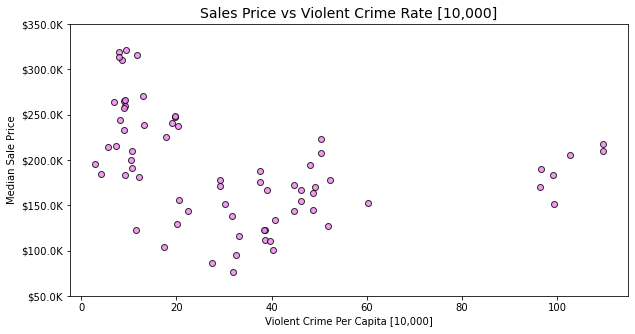

In [19]:
#scatter plot mapping violent crime with Price 

x_values = crimeDF['Violent Crime Per Capita [10,000]']
y_values = crimeDF['Median Sale Price']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, alpha=0.8, color ='violet', marker="o", edgecolor="black")

# Add labels
plt.xlabel('Violent Crime Per Capita [10,000]')
plt.ylabel('Median Sale Price')

#add title
plt.title("Sales Price vs Violent Crime Rate [10,000]", fontsize=14)


# add tick labels
locs, labels = plt.yticks() 
yLabels =('$' + str(float(x/1000.0)) + 'K' for x in locs)
plt.yticks(locs,yLabels )
 

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Violent Crime Vs Sales Price.png")
plt.savefig(output_path)
